In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.datasets import make_blobs

In [14]:
N = 100

# Згенеруємо випадкові дані для прикладу
angl = np.random.rand(N, 1) * 2 * np.pi

X1 = 100 * np.sin(angl) 
Y1 = 100 * np.cos(angl)
L = np.asarray([X1,Y1]).T.reshape(N, 2)

In [15]:
def clusters_2(N):
    centers = ((1, 1), (5, 10), (10, 12), (5, 7), (3, 2), (1, 4), (1, 6))
    X, Y = make_blobs(n_samples=N, cluster_std=1, centers=centers)
    return X, Y

In [16]:
N = 2000
X, Y = clusters_2(N)
X, Y = X[:, 0], X[:, 1]
M = np.asarray([X,Y]).T.reshape(N, 2)

In [17]:
M[:,0] = M[:,0] / M[:,0].max()
M[:,1] = M[:,1] / M[:,1].max()
M[:,0] = M[:,0] + M[:,0].max()
M[:,1] = M[:,1] + M[:,1].max()

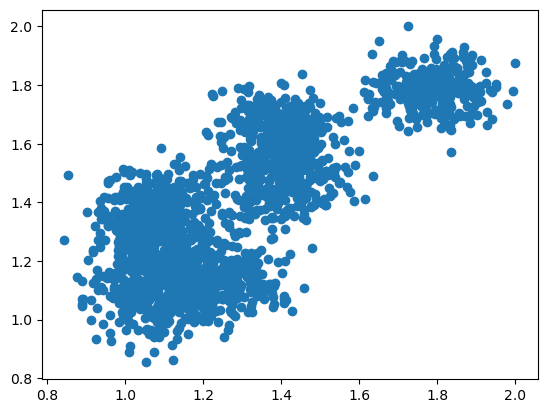

In [18]:
fig = plt.scatter(M[:, 0], M[:, 1])
plt.show()

In [44]:
def plot(A, centroids, k):
    c = ['r', 'g', 'b']
    vor = Voronoi(np.concatenate((centroids, L)))
    fig = plt.figure()
    ax = fig.add_subplot()
    for i in range(k):
        ax.scatter(M[:,0] * A[i] , M[:,1] * A[i], color =c[i])
    ax.scatter(centroids[:,0] , centroids[:,1], color ='black', s = 200)
    fig = voronoi_plot_2d(vor, ax=ax, line_width=2, point_size=0, line_style='solid')
    plt.xlim(0.75, 2)
    plt.ylim(0.75, 2)
    #plt.savefig('graph.png')
    plt.show()
    

In [45]:
k = 3
p = 0
centroids = np.array([M[random.randint(0, N)], M[random.randint(0, N)], M[random.randint(0, N)]])
centroids = np.array([M[3], M[N//3 + 3], M[2 * N // 3 + 2]])
max_iter = 10
def f(A, B, C):
    return ((A <= B)*1 + (A <= C)*1) == 2

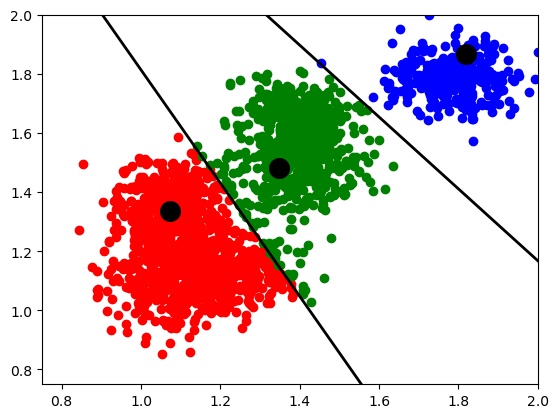

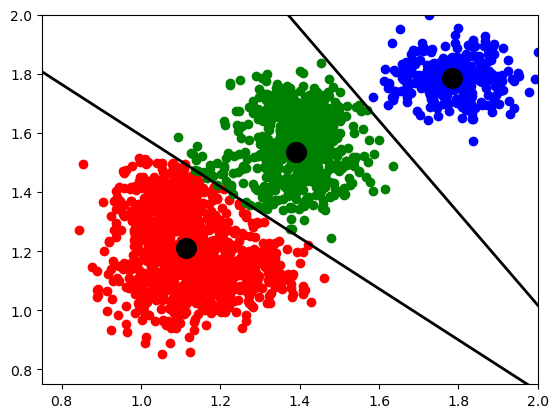

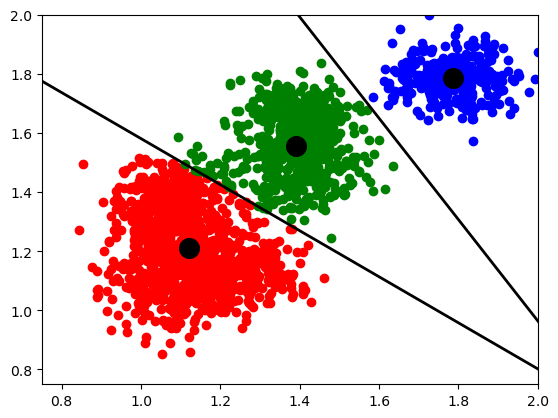

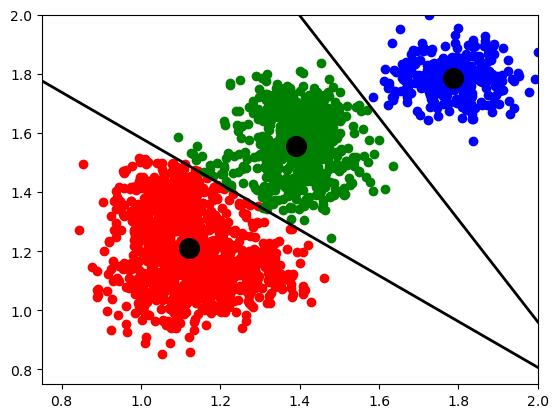

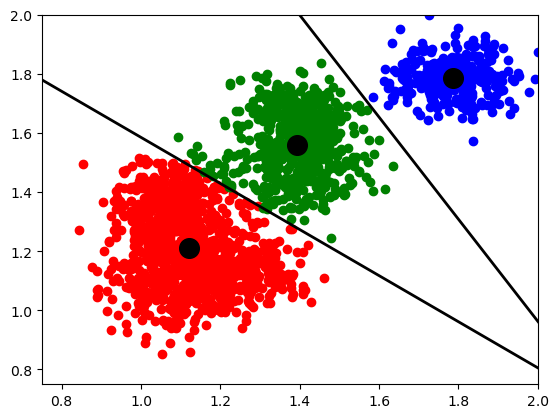

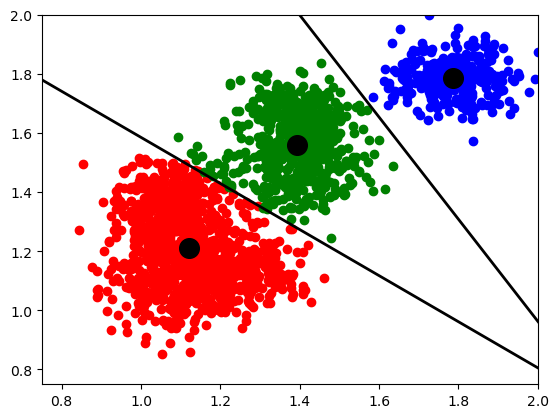

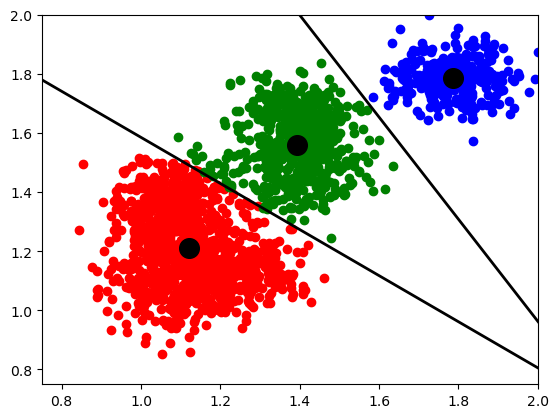

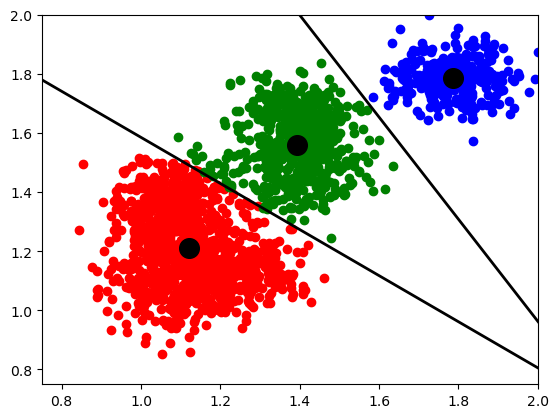

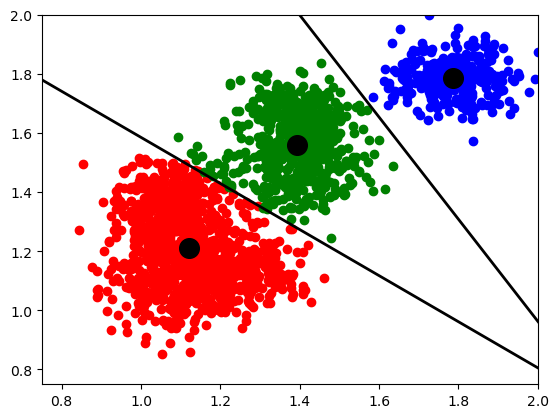

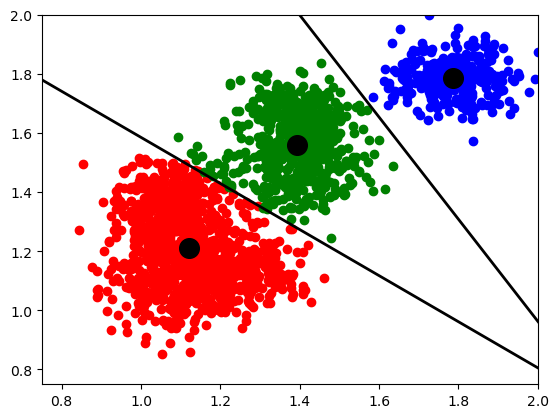

In [46]:
while True:
    dist = ((M - centroids[0]) ** 2)
    for i in range(k - 1):
        dist0 = ((M - centroids[i + 1]) ** 2)
        dist = np.concatenate((dist, dist0))
    
    dist = dist.reshape(k, N, 2)
    dist = dist.sum(axis = 2)
    A = f(dist[0], dist[1], dist[2])
    for i in range(1, k):
        A = np.concatenate((A, f(dist[i%k], dist[(i+1)%k], dist[(i+2)%k])))
    A = A.reshape(k, N)
    plot(A, centroids, k)
    centroids = np.dot(A, M)
    A1 = A.sum(axis = 1)
    for i in range(k):
        centroids[i] = centroids[i] / A1[i]
    
    p+=1
    if p > max_iter - 1:
        break